In [1]:
import seaborn
import scipy.stats as sc
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pylab as pl
%matplotlib inline

/Users/JordanVani/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jvani/PUI2016_jmv423/master/HW3_jmv423/CitiBike.csv')
df = df.drop(df.columns[[1,2,3,4,5,7,8]], axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df1 = df.copy()
df1['days'] = df[['Date']].apply(lambda x: dt.datetime.strftime(x['Date'], '%A'), axis=1)
df1.head()

,Date,24-Hour Passes Purchased (midnight to 11:59 pm),days
0,2016-04-01,1113,Friday
1,2016-04-02,1193,Saturday
2,2016-04-03,448,Sunday
3,2016-04-04,49,Monday
4,2016-04-05,341,Tuesday


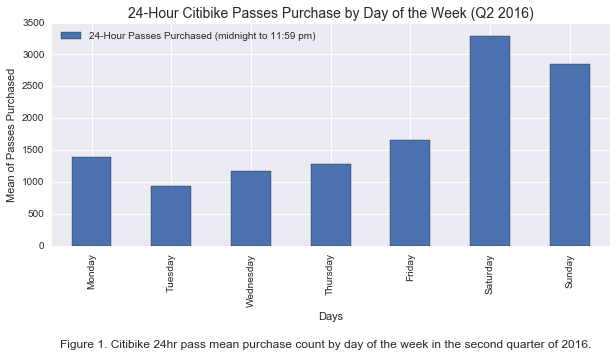

In [3]:
df1_grouped = df1.groupby(['days'])['24-Hour Passes Purchased (midnight to 11:59 pm)'].mean().reset_index()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(weekdays)}
key = df1_grouped['days'].map(mapping)    
df1_grouped = df1_grouped.iloc[key.argsort()]

ax = df1_grouped.plot(kind = 'bar', x = 'days', figsize = (10,4))
ax.set_ylabel('Mean of Passes Purchased')
ax.set_xlabel('Days')
ax.set_title('24-Hour Citibike Passes Purchase by Day of the Week (Q2 2016)', fontsize = 14)
ax.text(-0.4,-1600,'Figure 1. Citibike 24hr pass mean purchase count by day of the week in the second \
quarter of 2016.', fontsize = 12)

### Idea: There are more 24-hour passes sold on the weekend than on weekdays.

$H_o$: There are equal or significantly less 24-hour citibike passes sold on the weekend compared to weekdays for the second quarter of 2016 (p=0.05).

$H_a$: There are significantly more 24-hour citibike passes sold on the weekend compared to weekdays for the second quarter of 2016 (p=0.05).

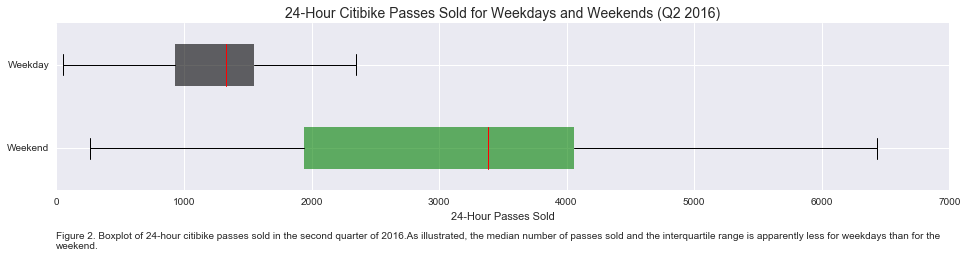

In [4]:
a = ['Saturday', 'Sunday']
df1['weekend'] = df1.days.isin(a)

weekend = df1.query('weekend == True')
weekday = df1.query('weekend == False')
weekend = weekend['24-Hour Passes Purchased (midnight to 11:59 pm)']
weekday = weekday['24-Hour Passes Purchased (midnight to 11:59 pm)']
boxdata = [weekend, weekday]

fig, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16,3))
box = ax1.boxplot(boxdata, vert = False, widths = 0.5, patch_artist = True,
                 labels = ['Weekend', 'Weekday'])
colors = ['g', 'k']
for patch, x in zip(box['boxes'], colors): 
    patch.set(facecolor = x, alpha=0.6, linewidth = 0)
pl.setp(box['whiskers'], color = 'k', linestyle='-')
ax1.set_title('24-Hour Citibike Passes Sold for Weekdays and Weekends (Q2 2016)', fontsize = 14)
ax1.set_xlabel('24-Hour Passes Sold')
ax1.text(0, -0.2, 'Figure 2. Boxplot of 24-hour citibike passes sold in the second quarter of 2016.\
As illustrated, the median number of passes sold and the interquartile range is apparently less \
for weekdays than for the \nweekend.')

In [5]:
weekend.describe()

count      26.000000
mean     3072.153846
std      1595.688408
min       260.000000
25%      1942.250000
50%      3383.500000
75%      4058.250000
max      6432.000000
Name: 24-Hour Passes Purchased (midnight to 11:59 pm), dtype: float64

In [6]:
weekday.describe()

count      65.000000
mean     1287.923077
std       672.609455
min        49.000000
25%       927.000000
50%      1331.000000
75%      1549.000000
max      4230.000000
Name: 24-Hour Passes Purchased (midnight to 11:59 pm), dtype: float64

In [7]:
sc.ttest_ind(weekend, weekday, axis=0, equal_var=False)

Ttest_indResult(statistic=5.5090988756907748, pvalue=6.4350141869036306e-06)

#### Since the p-value is < 0.05 we can reject the null hypothesis and accept the alternative hypothesis: there are significantly more 24-hour citibike passes sold on the weekend compared to weekdays for the second quarter of 2016 (p=0.05).